In [1]:
import requests
import re
import json
import pandas as pd
import numpy as np
from itertools import chain
from matplotlib import pyplot as plt

In [2]:
metric_to_principle = {
    "unique_identifier": "findable",
    "metadata_identifier_persistence": "findable",
    "data_identifier_persistence": "findable",
    "structured_metadata": "findable",
    "grounded_metadata": "findable",
    "data_identifier_in_metadata": "findable",
    "metadata_identifier_in_metadata": "findable",
    "searchable": "findable",
    "data_protocol": "accessible",
    "metadata_protocol": "accessible",
    "data_authorization": "accessible",
    "metadata_authorization": "accessible",
    "metadata_persistence": "accessible",
    "metadata_kr_language_weak": "interoperable",
    "metadata_kr_language_strong": "interoperable",
    "data_kr_language_weak": "interoperable",
    "data_kr_language_strong": "interoperable",
    "metadata_uses_fair_vocabularies_weak": "interoperable",
    "metadata_uses_fair_vocabularies_strong": "interoperable",
    "metadata_contains_outward_links": "interoperable",
    "metadata_includes_license_weak": "reusable",
    "metadata_includes_license_strong": "reusable"
}

metrics_ordered = list(metric_to_principle.keys())

In [3]:
def build_result_json(assessment_result):
    if assessment_result is None:
        return None
    content = assessment_result.get("contains")
    result_list = []
    for k in content.keys():
        score_key = "http://semanticscience.org/resource/SIO_000300"
        metric = re.search(r'(?<=https://w3id.org/FAIR_Tests/tests/gen2_).*$', k).group()
        try:
            score = content.get(k)[0].get(score_key)[0].get("@value")
        except AttributeError:
            score = None
        result_dict = {
            "metric": metric,
            "score": score
        }
        result_list.append(result_dict)
    return result_list

In [4]:
def get_assessment(url):
    global count
    print(count)
    print(url)

    api_connection = "https://api.fair-enough.semanticscience.org/evaluations"

    request_body = {
        "subject": url,
        "collection": "fair-evaluator-maturity-indicators"
    }


    response = requests.post(api_connection, json=request_body)

    if response.status_code != 201:
        print(response.status_code)
        print("_______________________________________")
        count += 1
        return None

    if response is None:
        return None

    result = build_result_json(response.json())
    print("_______________________________________")
    count += 1
    return result

In [5]:
def get_metrics_from_result(assessment_result):
    return [item.get('metric') for item in assessment_result]

def get_scores_from_result(assessment_result):
    return [item.get('score') for item in assessment_result]

In [6]:
def print_summary_stats(scores):
    print("Mean: "+str(scores.mean()))
    print("Median: "+str(+scores.median()))
    print("Min: "+str(scores.min()))
    print("Max: "+str(scores.max()))

# Papers

## Papers via DOI

## Papers via ORKG resource URL

## Papers via standard URL

# Comparisons

In [9]:
def expand_comp_df(df):
    df_exp = pd.DataFrame()
    df_exp["comparison"] = list(chain.from_iterable([[x]*22 for x in df["comparisons"]]))
    try:
        df_exp["doi"] = list(chain.from_iterable([[x]*22 for x in df["doi"]]))
    except KeyError:
        pass
    df_exp["metric"] = list(chain.from_iterable([get_metrics_from_result(assessment_result=x) for x in df["assessment_result"]]))
    df_exp["score_earned"] = list(chain.from_iterable([get_scores_from_result(assessment_result=x) for x in df["assessment_result"]]))
    df_exp["score_total"] = list(chain.from_iterable([[1]*22 for x in df["comparisons"]]))
    df_exp = df_exp[["comparison", "doi", "metric", "score_earned", "score_total"]]
    return df_exp

## Comparisons via DOI

In [41]:
%%script false --no-raise-error
comp_doi_df = pd.read_csv("raw_data/comparison_query_result_2023-03-29.csv")
comp_doi_df = comp_doi_df[comp_doi_df["doi"].isna() == False].reset_index(drop=True)
count = 0
comp_doi_df["assessment_result"] = comp_doi_df["doi"].map(lambda x: get_assessment(url="https://doi.org/" + x))
comp_doi_df.to_csv("assessed_data/comparison_doi_df_fenough_assessment.csv")
comp_doi_df

Couldn't find program: 'false'


In [42]:
comp_doi_df = pd.read_csv("assessed_data/comparison_doi_df_fenough_assessment.csv", index_col=0)
comp_doi_df = comp_doi_df[comp_doi_df["assessment_result"].isna() == False].reset_index(drop=True)
comp_doi_df["assessment_result"] = comp_doi_df["assessment_result"].map(lambda x: x.replace("\'", "\""))
comp_doi_df["assessment_result"] = comp_doi_df["assessment_result"].map(lambda x: x.replace("None", "\"None\""))
comp_doi_df["assessment_result"] = comp_doi_df["assessment_result"].map(lambda x: json.loads(x))
comp_doi_df

,comparisons,doi,assessment_result
0,http://orkg.org/orkg/resource/R140347,10.48366/r140347,"[{'metric': 'data_kr_language_weak', 'score': ..."
1,http://orkg.org/orkg/resource/R140449,10.48366/r140449,"[{'metric': 'structured_metadata', 'score': '1..."
2,http://orkg.org/orkg/resource/R140463,10.48366/r140463,"[{'metric': 'unique_identifier', 'score': '1'}..."
3,http://orkg.org/orkg/resource/R140465,10.48366/r140465,"[{'metric': 'unique_identifier', 'score': '1'}..."
4,http://orkg.org/orkg/resource/R140714,10.48366/r140714,"[{'metric': 'structured_metadata', 'score': '1..."
...,...,...,...
251,http://orkg.org/orkg/resource/R576870,10.48366/r576870,"[{'metric': 'metadata_identifier_persistence',..."
252,http://orkg.org/orkg/resource/R576872,10.48366/r576872,"[{'metric': 'unique_identifier', 'score': '1'}..."
253,http://orkg.org/orkg/resource/R576873,10.48366/r576873,"[{'metric': 'unique_identifier', 'score': '1'}..."
254,http://orkg.org/orkg/resource/R576874,10.48366/r576874,"[{'metric': 'unique_identifier', 'score': '1'}..."


In [43]:
comp_doi_df_assessed = expand_comp_df(comp_doi_df)
comp_doi_df_assessed[comp_doi_df_assessed["score_earned"] == "None"].value_counts("metric")

metric
data_protocol                             5
metadata_identifier_in_metadata           5
metadata_kr_language_weak                 5
structured_metadata                       4
data_kr_language_strong                   3
metadata_kr_language_strong               3
metadata_uses_fair_vocabularies_strong    3
data_authorization                        2
data_identifier_in_metadata               2
data_kr_language_weak                     2
grounded_metadata                         2
metadata_persistence                      2
metadata_contains_outward_links           1
metadata_includes_license_strong          1
metadata_protocol                         1
metadata_uses_fair_vocabularies_weak      1
dtype: int64

In [44]:
comp_doi_df_assessed["score_earned"] = comp_doi_df_assessed["score_earned"].map(lambda x: x.replace("None", "0"))
comp_doi_df_assessed["score_earned"] = comp_doi_df_assessed["score_earned"].map(lambda x: int(x))
comp_doi_df_assessed

,comparison,doi,metric,score_earned,score_total
0,http://orkg.org/orkg/resource/R140347,10.48366/r140347,data_kr_language_weak,0,1
1,http://orkg.org/orkg/resource/R140347,10.48366/r140347,metadata_identifier_persistence,1,1
2,http://orkg.org/orkg/resource/R140347,10.48366/r140347,unique_identifier,1,1
3,http://orkg.org/orkg/resource/R140347,10.48366/r140347,structured_metadata,1,1
4,http://orkg.org/orkg/resource/R140347,10.48366/r140347,grounded_metadata,1,1
...,...,...,...,...,...
5627,http://orkg.org/orkg/resource/R576876,10.48366/r576876,data_kr_language_strong,0,1
5628,http://orkg.org/orkg/resource/R576876,10.48366/r576876,data_identifier_persistence,0,1
5629,http://orkg.org/orkg/resource/R576876,10.48366/r576876,metadata_uses_fair_vocabularies_strong,0,1
5630,http://orkg.org/orkg/resource/R576876,10.48366/r576876,metadata_uses_fair_vocabularies_weak,1,1


In [45]:
comp_doi_df_total = comp_doi_df_assessed.groupby("comparison").agg({"doi": "first", "score_earned": "sum"}).reset_index()
print_summary_stats(comp_doi_df_total["score_earned"])

Mean: 10.93359375
Median: 11.0
Min: 9
Max: 11


In [46]:
comp_doi_df_principle = comp_doi_df_assessed
comp_doi_df_principle["principle"] = comp_doi_df_principle["metric"].map(lambda x: metric_to_principle[x])
comp_doi_df_principle = comp_doi_df_principle.groupby("principle").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()
comp_doi_df_principle["score_earned"] = comp_doi_df_principle["score_earned"]/len(comp_doi_df)
comp_doi_df_principle["score_total"] = comp_doi_df_principle["score_total"]/len(comp_doi_df)
comp_doi_df_principle['principle'] = pd.Categorical(comp_doi_df_principle['principle'], ['findable', 'accessible', 'interoperable', 'reusable'])
comp_doi_df_principle = comp_doi_df_principle.sort_values('principle')
comp_doi_df_principle

,principle,score_earned,score_total
1,findable,3.976562,8.0
0,accessible,1.996094,5.0
2,interoperable,3.960938,7.0
3,reusable,1.000000,2.0


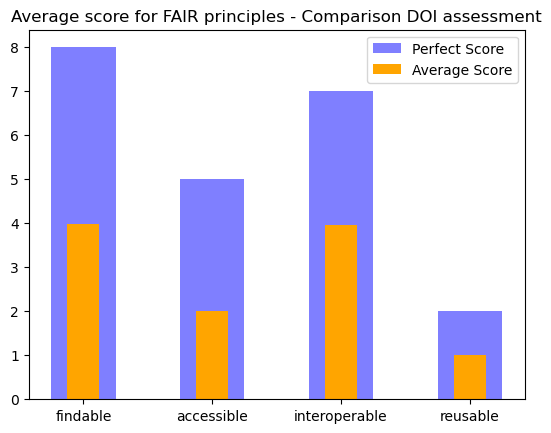

In [47]:
width = 0.5
perfect_scores = [8, 5, 7, 2]
actual_scores = comp_doi_df_principle['score_earned']
indices = np.arange(len(perfect_scores))

plt.bar(indices, perfect_scores, width=width, color='b', alpha=0.5, label='Perfect Score')
plt.bar([i for i in indices], actual_scores, width=0.5*width, color='orange', label='Average Score')
plt.xticks(indices, comp_doi_df_principle['principle'] )
plt.title("Average score for FAIR principles - Comparison DOI assessment")
plt.legend()
plt.show()

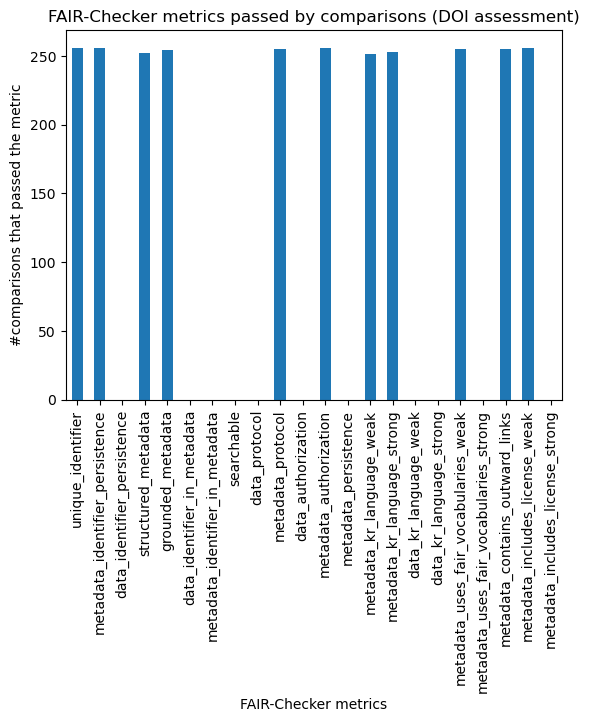

In [48]:
comp_doi_df_submetrics = comp_doi_df_assessed
comp_doi_df_submetrics = comp_doi_df_submetrics.groupby("metric").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()

comp_doi_df_submetrics["metric"] = pd.Categorical(comp_doi_df_submetrics["metric"], metrics_ordered)
comp_doi_df_submetrics = comp_doi_df_submetrics.sort_values("metric")

comp_doi_df_submetrics["score_earned"].plot(kind="bar")
locs, labels = plt.xticks()
plt.xticks(locs, metrics_ordered)
plt.title("FAIR-Checker metrics passed by comparisons (DOI assessment)")
plt.ylabel("#comparisons that passed the metric")
plt.xlabel("FAIR-Checker metrics")
plt.show()

## Comparisons via ORKG resource URL

In [49]:
%%script false --no-raise-error
comp_doi_df = pd.read_csv("raw_data/comparison_query_result_2023-03-29.csv")
comp_doi_df = comp_doi_df[comp_doi_df["comparisons"].isna() == False].reset_index(drop=True)
count = 0
comp_doi_df["assessment_result"] = comp_doi_df["comparisons"].map(lambda x: get_assessment(url=x))
comp_doi_df.to_csv("assessed_data/comparison_url_df_fenough_assessment.csv")
comp_doi_df

Couldn't find program: 'false'


In [50]:
comp_url_df = pd.read_csv("assessed_data/comparison_url_df_fenough_assessment.csv", index_col=0)
comp_url_df = comp_url_df[comp_url_df["assessment_result"].isna() == False].reset_index(drop=True)
comp_url_df["assessment_result"] = comp_url_df["assessment_result"].map(lambda x: x.replace("\'", "\""))
comp_url_df["assessment_result"] = comp_url_df["assessment_result"].map(lambda x: x.replace("None", "\"None\""))
comp_url_df["assessment_result"] = comp_url_df["assessment_result"].map(lambda x: json.loads(x))
comp_url_df

,comparisons,doi,assessment_result
0,http://orkg.org/orkg/resource/R140347,10.48366/r140347,"[{'metric': 'metadata_identifier_persistence',..."
1,http://orkg.org/orkg/resource/R140449,10.48366/r140449,"[{'metric': 'metadata_identifier_persistence',..."
2,http://orkg.org/orkg/resource/R140463,10.48366/r140463,"[{'metric': 'unique_identifier', 'score': '1'}..."
3,http://orkg.org/orkg/resource/R140714,10.48366/r140714,"[{'metric': 'metadata_identifier_persistence',..."
4,http://orkg.org/orkg/resource/R140726,10.48366/r140726,"[{'metric': 'metadata_identifier_persistence',..."
...,...,...,...
1004,http://orkg.org/orkg/resource/R203903,NaN,"[{'metric': 'unique_identifier', 'score': '1'}..."
1005,http://orkg.org/orkg/resource/R204005,NaN,"[{'metric': 'metadata_identifier_persistence',..."
1006,http://orkg.org/orkg/resource/R288079,NaN,"[{'metric': 'metadata_authorization', 'score':..."
1007,http://orkg.org/orkg/resource/R288672,NaN,"[{'metric': 'unique_identifier', 'score': '1'}..."


In [51]:
comp_url_df_assessed = expand_comp_df(comp_url_df)
comp_url_df_assessed[comp_url_df_assessed["score_earned"] == "None"].value_counts("metric")

metric
metadata_contains_outward_links           10
metadata_identifier_in_metadata            9
data_kr_language_strong                    9
data_protocol                              8
grounded_metadata                          8
metadata_includes_license_strong           7
metadata_persistence                       6
data_kr_language_weak                      6
data_identifier_in_metadata                6
data_identifier_persistence                5
metadata_kr_language_strong                5
metadata_uses_fair_vocabularies_strong     4
metadata_protocol                          4
data_authorization                         4
metadata_kr_language_weak                  1
metadata_includes_license_weak             1
structured_metadata                        1
dtype: int64

In [52]:
comp_url_df_assessed["score_earned"] = comp_url_df_assessed["score_earned"].map(lambda x: x.replace("None", "0"))
comp_url_df_assessed["score_earned"] = comp_url_df_assessed["score_earned"].map(lambda x: int(x))
comp_url_df_assessed

,comparison,doi,metric,score_earned,score_total
0,http://orkg.org/orkg/resource/R140347,10.48366/r140347,metadata_identifier_persistence,0,1
1,http://orkg.org/orkg/resource/R140347,10.48366/r140347,metadata_authorization,1,1
2,http://orkg.org/orkg/resource/R140347,10.48366/r140347,unique_identifier,1,1
3,http://orkg.org/orkg/resource/R140347,10.48366/r140347,grounded_metadata,1,1
4,http://orkg.org/orkg/resource/R140347,10.48366/r140347,data_authorization,0,1
...,...,...,...,...,...
22193,http://orkg.org/orkg/resource/R288673,NaN,metadata_kr_language_weak,1,1
22194,http://orkg.org/orkg/resource/R288673,NaN,metadata_persistence,0,1
22195,http://orkg.org/orkg/resource/R288673,NaN,searchable,0,1
22196,http://orkg.org/orkg/resource/R288673,NaN,metadata_uses_fair_vocabularies_strong,0,1


In [53]:
comp_url_df_total = comp_url_df_assessed.groupby("comparison").agg({"doi": "first", "score_earned": "sum"}).reset_index()
print_summary_stats(comp_url_df_total["score_earned"])

Mean: 6.953419226957384
Median: 7.0
Min: 3
Max: 7


In [54]:
comp_url_df_principle = comp_url_df_assessed
comp_url_df_principle["principle"] = comp_url_df_principle["metric"].map(lambda x: metric_to_principle[x])
comp_url_df_principle = comp_url_df_principle.groupby("principle").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()
comp_url_df_principle["score_earned"] = comp_url_df_principle["score_earned"]/len(comp_url_df)
comp_url_df_principle["score_total"] = comp_url_df_principle["score_total"]/len(comp_url_df)
comp_url_df_principle['principle'] = pd.Categorical(comp_url_df_principle['principle'], ['findable', 'accessible', 'interoperable', 'reusable'])
comp_url_df_principle = comp_url_df_principle.sort_values('principle')
comp_url_df_principle

,principle,score_earned,score_total
1,findable,2.978196,8.0
0,accessible,1.996036,5.0
2,interoperable,1.979187,7.0
3,reusable,0.000000,2.0


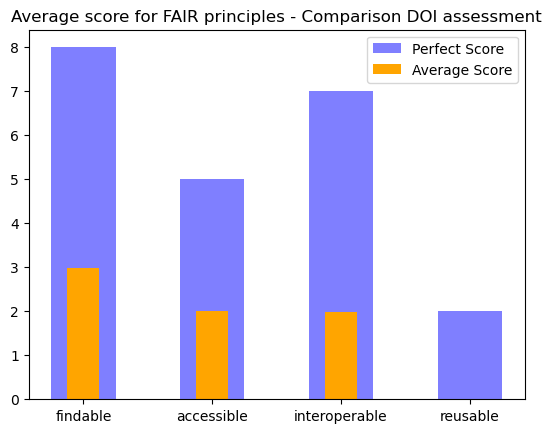

In [55]:
width = 0.5
perfect_scores = [8, 5, 7, 2]
actual_scores = comp_url_df_principle['score_earned']
indices = np.arange(len(perfect_scores))

plt.bar(indices, perfect_scores, width=width, color='b', alpha=0.5, label='Perfect Score')
plt.bar([i for i in indices], actual_scores, width=0.5*width, color='orange', label='Average Score')
plt.xticks(indices, comp_url_df_principle['principle'] )
plt.title("Average score for FAIR principles - Comparison DOI assessment")
plt.legend()
plt.show()

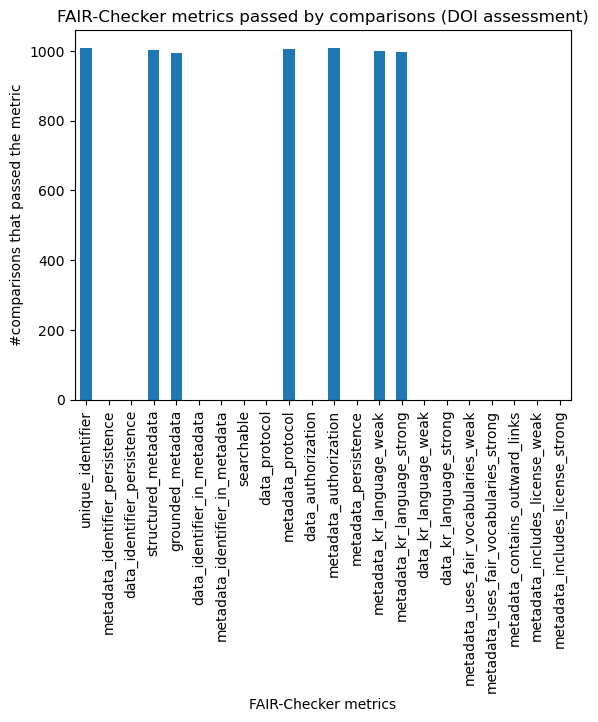

In [56]:
comp_url_df_submetrics = comp_url_df_assessed
comp_url_df_submetrics = comp_url_df_submetrics.groupby("metric").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()

comp_url_df_submetrics["metric"] = pd.Categorical(comp_url_df_submetrics["metric"], metrics_ordered)
comp_url_df_submetrics = comp_url_df_submetrics.sort_values("metric")

comp_url_df_submetrics["score_earned"].plot(kind="bar")
locs, labels = plt.xticks()
plt.xticks(locs, metrics_ordered)
plt.title("FAIR Evaluator metrics passed by comparisons (DOI assessment)")
plt.ylabel("#comparisons that passed the metric")
plt.xlabel("FAIR Evaluator metrics")
plt.show()

## Comparison of Comparisons

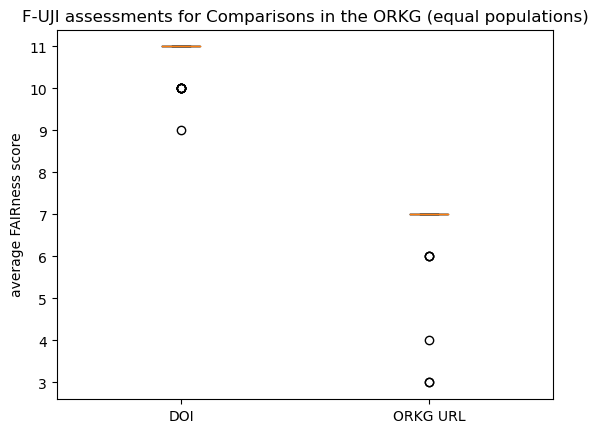

In [57]:
doi_orkg_df = pd.merge(comp_doi_df_total, comp_url_df_total, on=["comparison", "doi"], suffixes=("_doi", "_orkg"))
assessement_data_merged = [doi_orkg_df["score_earned_doi"], doi_orkg_df["score_earned_orkg"]]
plt.boxplot(assessement_data_merged)
plt.title("FAIR Evaluator assessments for Comparisons in the ORKG (equal populations)")
locs, labels = plt.xticks()
plt.xticks(locs, ["DOI", "ORKG URL"])
plt.ylabel("average FAIRness score")
plt.show()

# Resources

In [77]:
def expand_resource_df(df):
    df_exp = pd.DataFrame()
    df_exp["resource"] = list(chain.from_iterable([[x]*22 for x in df["resources"]]))
    df_exp["type_rsrc"] = list(chain.from_iterable([[x]*22 for x in df["type_rsrc"]]))
    df_exp["type_other"] = list(chain.from_iterable([[x]*22 for x in df["type_other"]]))
    df_exp["metric"] = list(chain.from_iterable([get_metrics_from_result(assessment_result=x) for x in df["assessment_summary"]]))
    df_exp["score_earned"] = list(chain.from_iterable([get_scores_from_result(assessment_result=x) for x in df["assessment_summary"]]))
    df_exp["score_total"] = list(chain.from_iterable([[1]*22 for x in df["resources"]]))
    df_exp = df_exp[["resource", "type_rsrc", "type_other", "metric", "score_earned", "score_total"]]
    return df_exp

In [59]:
%%script false --no-raise-error
resource_df = pd.read_csv("raw_data/resource_query_result_2023-04-05.csv")
resource_rsrc_df = resource_df[resource_df["type"].str.endswith("Resource")]
resource_others_df = resource_df[np.logical_not(resource_df["type"].str.endswith("Resource"))]
resource_df = pd.merge(resource_rsrc_df, resource_others_df, on="resources", how="outer", suffixes=("_rsrc", "_other"))
resource_df = resource_df[np.logical_not(resource_df["type_other"].str.endswith("Paper") | resource_df["type_other"].str.endswith("Comparison"))].reset_index(drop=True)
resource_df = resource_df.sample(n=3000, random_state=13)
resource_df = resource_df.reset_index(drop=True)
count = 0
resource_df["assessment_summary"] = resource_df["resources"].map(lambda x: get_assessment(x))
resource_df.to_csv("assessed_data/resource_df_fenough_assessment.csv")
resource_df

Couldn't find program: 'false'


In [78]:
resource_df = pd.read_csv("assessed_data/resource_df_fenough_assessment.csv", index_col=0)
resource_df = resource_df[resource_df["assessment_summary"].isna() == False].reset_index(drop=True)
resource_df["assessment_summary"] = resource_df["assessment_summary"].map(lambda x: x.replace("\'", "\""))
resource_df["assessment_summary"] = resource_df["assessment_summary"].map(lambda x: x.replace("None", "\"None\""))
resource_df["assessment_summary"] = resource_df["assessment_summary"].map(lambda x: json.loads(x))
resource_df_assessed = expand_resource_df(resource_df)
resource_df_assessed

,resource,type_rsrc,type_other,metric,score_earned,score_total
0,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,unique_identifier,1,1
1,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,metadata_identifier_persistence,0,1
2,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,metadata_authorization,1,1
3,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,structured_metadata,1,1
4,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,metadata_contains_outward_links,0,1
...,...,...,...,...,...,...
58757,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,metadata_uses_fair_vocabularies_weak,0,1
58758,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,structured_metadata,1,1
58759,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,data_identifier_in_metadata,0,1
58760,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,metadata_identifier_in_metadata,0,1


In [79]:
resource_df_assessed[resource_df_assessed["score_earned"] == "None"].value_counts("metric")

metric
data_kr_language_strong                   26
data_protocol                             18
data_authorization                        17
metadata_kr_language_strong               17
data_identifier_in_metadata               15
metadata_identifier_in_metadata           15
grounded_metadata                         14
metadata_uses_fair_vocabularies_strong    14
metadata_persistence                      13
structured_metadata                       12
data_kr_language_weak                     11
metadata_includes_license_weak            11
metadata_contains_outward_links           10
metadata_includes_license_strong          10
data_identifier_persistence               10
metadata_kr_language_weak                 10
metadata_protocol                          8
metadata_authorization                     3
dtype: int64

In [80]:
resource_df_assessed["score_earned"] = resource_df_assessed["score_earned"].map(lambda x: x.replace("None", "0"))
resource_df_assessed["score_earned"] = resource_df_assessed["score_earned"].map(lambda x: int(x))
resource_df_assessed

,resource,type_rsrc,type_other,metric,score_earned,score_total
0,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,unique_identifier,1,1
1,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,metadata_identifier_persistence,0,1
2,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,metadata_authorization,1,1
3,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,structured_metadata,1,1
4,http://orkg.org/orkg/resource/R145348,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Contribution,metadata_contains_outward_links,0,1
...,...,...,...,...,...,...
58757,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,metadata_uses_fair_vocabularies_weak,0,1
58758,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,structured_metadata,1,1
58759,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,data_identifier_in_metadata,0,1
58760,http://orkg.org/orkg/resource/PWC_CONTEXT_AWAR...,http://orkg.org/orkg/class/Resource,http://orkg.org/orkg/class/Model,metadata_identifier_in_metadata,0,1


In [81]:
resource_df_total = resource_df_assessed.groupby("resource").agg({"type_rsrc": "first", "type_other": "first", "score_earned": "sum"}).reset_index()
print_summary_stats(resource_df_total["score_earned"])

Mean: 6.996995869320315
Median: 7.0
Min: 5
Max: 14


In [83]:
resource_df_principle = resource_df_assessed
resource_df_principle["principle"] = resource_df_principle["metric"].map(lambda x: metric_to_principle[x])
resource_df_principle = resource_df_principle.groupby("principle").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()
resource_df_principle["score_earned"] = resource_df_principle["score_earned"]/len(resource_df)
resource_df_principle["score_total"] = resource_df_principle["score_total"]/len(resource_df)
resource_df_principle['principle'] = pd.Categorical(resource_df_principle['principle'], ['findable', 'accessible', 'interoperable', 'reusable'])
resource_df_principle = resource_df_principle.sort_values('principle')
resource_df_principle

,principle,score_earned,score_total
1,findable,2.990266,8.0
0,accessible,1.995882,5.0
2,interoperable,1.989891,7.0
3,reusable,0.000000,2.0


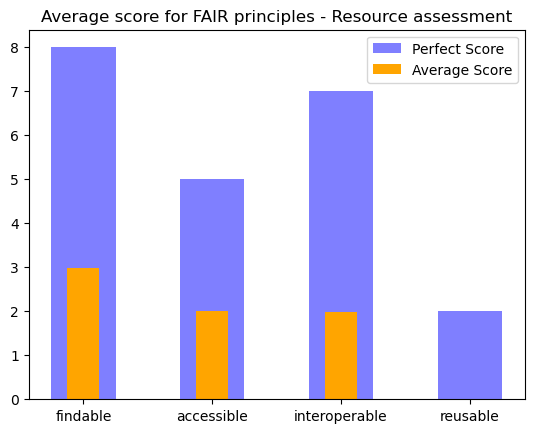

In [84]:
width = 0.5
perfect_scores = [8, 5, 7, 2]
actual_scores = resource_df_principle['score_earned']
indices = np.arange(len(perfect_scores))

plt.bar(indices, perfect_scores, width=width, color='b', alpha=0.5, label='Perfect Score')
plt.bar([i for i in indices], actual_scores, width=0.5*width, color='orange', label='Average Score')
plt.xticks(indices, resource_df_principle['principle'] )
plt.title("Average score for FAIR principles - Resource assessment")
plt.legend()
plt.show()

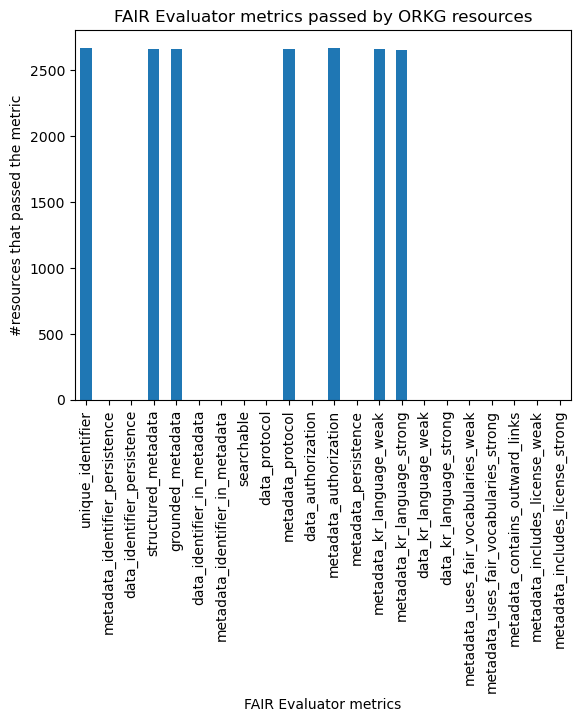

In [85]:
resource_df_submetrics = resource_df_assessed
resource_df_submetrics = resource_df_submetrics.groupby("metric").agg({"score_earned": "sum", "score_total": "sum"}).reset_index()

resource_df_submetrics["metric"] = pd.Categorical(resource_df_submetrics["metric"], metrics_ordered)
resource_df_submetrics = resource_df_submetrics.sort_values("metric")

resource_df_submetrics["score_earned"].plot(kind="bar")
locs, labels = plt.xticks()
plt.xticks(locs, metrics_ordered)
plt.title("FAIR Evaluator metrics passed by ORKG resources")
plt.ylabel("#resources that passed the metric")
plt.xlabel("FAIR Evaluator metrics")
plt.show()

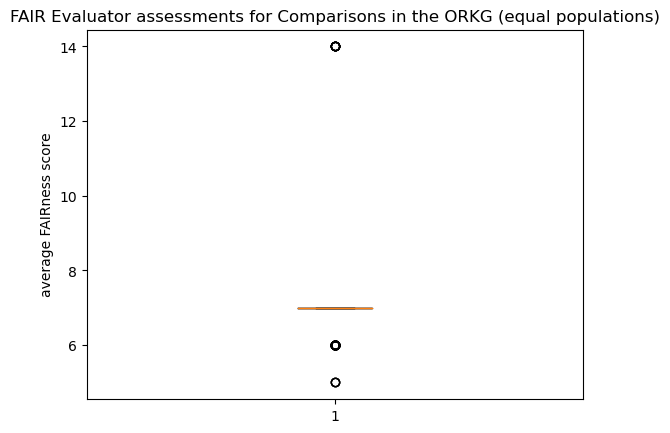

In [88]:
plt.boxplot(resource_df_total["score_earned"])
plt.title("FAIR Evaluator assessments for Comparisons in the ORKG (equal populations)")
plt.ylabel("average FAIRness score")
plt.show()